# Veri Anlama ve Ön İşleme

In [37]:
import pandas as pd

file_path = "AB_Test_Results.csv" 
df = pd.read_csv(file_path)

In [38]:
print("İlk 5 Satır:")
print(df.head())

İlk 5 Satır:
   USER_ID VARIANT_NAME  REVENUE
0      737      variant      0.0
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
4     6174      variant      0.0


In [39]:
print("\nVeri Setinin Genel Bilgileri:")
print(df.info())


Veri Setinin Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
None


In [40]:
print("\nEksik Veri Kontrolü:")
print(df.isnull().sum())


Eksik Veri Kontrolü:
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64


In [41]:
print("\nTemel İstatistikler:")
print(df.describe())


Temel İstatistikler:
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000


In [42]:
print("\nVARIANT_NAME Sütunu Değerleri ve Dağılımı:")
print(df["VARIANT_NAME"].value_counts())


VARIANT_NAME Sütunu Değerleri ve Dağılımı:
variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64


In [43]:
print("\nSütun Veri Tipleri:")
print(df.dtypes)


Sütun Veri Tipleri:
USER_ID           int64
VARIANT_NAME     object
REVENUE         float64
dtype: object


In [44]:
df["USER_ID"] = df["USER_ID"].astype(str)
df["VARIANT_NAME"] = df["VARIANT_NAME"].astype("category")

print("\nDüzeltilmiş Sütun Veri Tipleri:")
print(df.dtypes)


Düzeltilmiş Sütun Veri Tipleri:
USER_ID           object
VARIANT_NAME    category
REVENUE          float64
dtype: object


# Hipotez Tanımlama ve İlk Keşif Analizi

In [45]:
import numpy as np

print("🔎 A/B Testinin Amacı:")
print("Bu A/B testinin amacı, varyant grubundaki kullanıcılardan elde edilen gelirinin, kontrol grubuna göre anlamlı bir fark oluşturup oluşturmadığını belirlemektir.")

print("\n🎯 Hipotezler:")
print("H0 (Null Hipotezi): Varyant grubundan elde edilen gelir, kontrol grubundan elde edilen gelirden istatistiksel olarak farklı değildir.")
print("H1 (Alternatif Hipotez): Varyant grubundan elde edilen gelir, kontrol grubundan elde edilen gelirden istatistiksel olarak farklıdır.")

🔎 A/B Testinin Amacı:
Bu A/B testinin amacı, varyant grubundaki kullanıcılardan elde edilen gelirinin, kontrol grubuna göre anlamlı bir fark oluşturup oluşturmadığını belirlemektir.

🎯 Hipotezler:
H0 (Null Hipotezi): Varyant grubundan elde edilen gelir, kontrol grubundan elde edilen gelirden istatistiksel olarak farklı değildir.
H1 (Alternatif Hipotez): Varyant grubundan elde edilen gelir, kontrol grubundan elde edilen gelirden istatistiksel olarak farklıdır.


In [46]:
control_group = df[df["VARIANT_NAME"] == "control"]["REVENUE"]
variant_group = df[df["VARIANT_NAME"] == "variant"]["REVENUE"]

control_mean = np.mean(control_group)
variant_mean = np.mean(variant_group)

control_median = np.median(control_group)
variant_median = np.median(variant_group)

control_std = np.std(control_group, ddof=1)
variant_std = np.std(variant_group, ddof=1)

In [47]:
print("\n📊 Grup Bazında Temel İstatistikler:")
print(f"Kontrol Grubu: Ortalama Gelir = {control_mean:.4f}, Ortanca Gelir = {control_median:.4f}, Standart Sapma = {control_std:.4f}")
print(f"Varyant Grubu: Ortalama Gelir = {variant_mean:.4f}, Ortanca Gelir = {variant_median:.4f}, Standart Sapma = {variant_std:.4f}")


📊 Grup Bazında Temel İstatistikler:
Kontrol Grubu: Ortalama Gelir = 0.1290, Ortanca Gelir = 0.0000, Standart Sapma = 3.0075
Varyant Grubu: Ortalama Gelir = 0.0701, Ortanca Gelir = 0.0000, Standart Sapma = 1.3148


# Veri Keşfi ve Görselleştirme

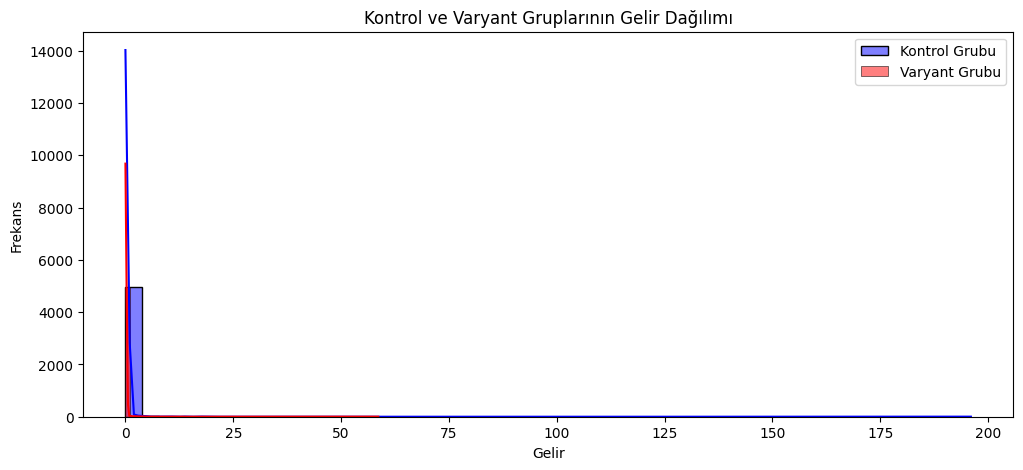

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(control_group, bins=50, color="blue", alpha=0.5, label="Kontrol Grubu", kde=True)
sns.histplot(variant_group, bins=50, color="red", alpha=0.5, label="Varyant Grubu", kde=True)
plt.legend()
plt.title("Kontrol ve Varyant Gruplarının Gelir Dağılımı")
plt.xlabel("Gelir")
plt.ylabel("Frekans")
plt.show()

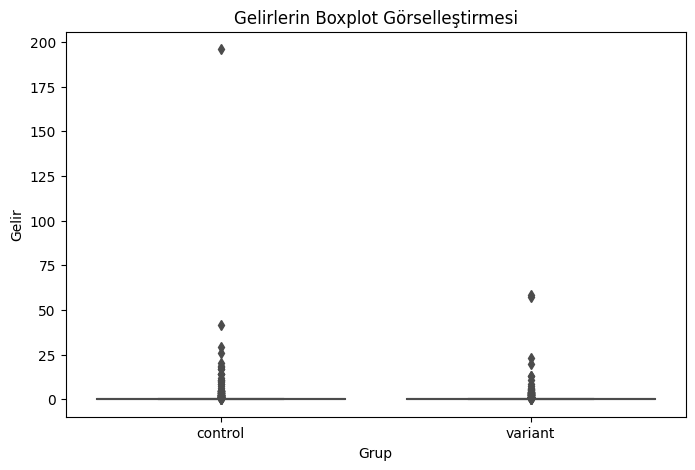

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["VARIANT_NAME"], y=df["REVENUE"], palette={"control": "blue", "variant": "red"})
plt.title("Gelirlerin Boxplot Görselleştirmesi")
plt.xlabel("Grup")
plt.ylabel("Gelir")
plt.show()

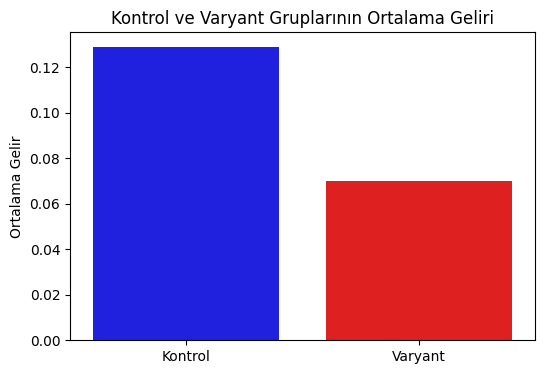

In [50]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Kontrol", "Varyant"], y=[control_mean, variant_mean], palette=["blue", "red"])
plt.title("Kontrol ve Varyant Gruplarının Ortalama Geliri")
plt.ylabel("Ortalama Gelir")
plt.show()

# İstatiksel Test Seçimi

In [51]:
import scipy.stats as stats

shapiro_control = stats.shapiro(control_group)
shapiro_variant = stats.shapiro(variant_group)

ks_control = stats.kstest(control_group, 'norm')
ks_variant = stats.kstest(variant_group, 'norm')

print("Shapiro-Wilk Testi (Kontrol Grubu): p-değeri =", shapiro_control.pvalue)
print("Shapiro-Wilk Testi (Varyant Grubu): p-değeri =", shapiro_variant.pvalue)

print("Kolmogorov-Smirnov Testi (Kontrol Grubu): p-değeri =", ks_control.pvalue)
print("Kolmogorov-Smirnov Testi (Varyant Grubu): p-değeri =", ks_variant.pvalue)


Shapiro-Wilk Testi (Kontrol Grubu): p-değeri = 0.0
Shapiro-Wilk Testi (Varyant Grubu): p-değeri = 0.0
Kolmogorov-Smirnov Testi (Kontrol Grubu): p-değeri = 0.0
Kolmogorov-Smirnov Testi (Varyant Grubu): p-değeri = 0.0


c:\Users\Fallrytme\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
levene_test = stats.levene(control_group, variant_group)
print("Levene Testi (Varyans Homojenliği): p-değeri =", levene_test.pvalue)

Levene Testi (Varyans Homojenliği): p-değeri = 0.2037000785338918


In [53]:
if shapiro_control.pvalue > 0.05 and shapiro_variant.pvalue > 0.05:
    print("Veri normal dağılıyor, bağımsız örneklem t-testi uygulanabilir.")
    
    ttest = stats.ttest_ind(control_group, variant_group, equal_var=levene_test.pvalue > 0.05)
    print("Bağımsız Örneklem T-Testi Sonucu: p-değeri =", ttest.pvalue)
    
else:
    print("Veri normal DAĞILMIYOR, parametrik olmayan Mann-Whitney U testi uygulanıyor.")
    
    mann_whitney = stats.mannwhitneyu(control_group, variant_group, alternative="two-sided")
    print("Mann-Whitney U Testi Sonucu: p-değeri =", mann_whitney.pvalue)

Veri normal DAĞILMIYOR, parametrik olmayan Mann-Whitney U testi uygulanıyor.
Mann-Whitney U Testi Sonucu: p-değeri = 0.47825247965294926


# Sonuçların Yorumlanması

In [54]:
def ab_test_sonuc_yorumu(p_value, alpha=0.05):
    print("\n📊 **A/B Testi Sonuçları**\n")
    
    if p_value < alpha:
        print(f"❌ p-değeri = {p_value:.4f} < {alpha}, yani H0 REDDEDİLİR!")
        print("✅ Yeni varyantın, gelir üzerinde anlamlı bir fark yaratıyor.")
        print("🚀 Aksiyon: Yeni varyant mevcut olanın yerine kullanılabilir.")
    else:
        print(f"✅ p-değeri = {p_value:.4f} >= {alpha}, istatistiksel olarak anlamlı bir fark bulunamadı, yani H0 REDDEDİLEMEZ!")
        print("❌ Yeni varyantın gelir üzerinde anlamlı bir etkisi yok.")
        print("\n 🔍 Analizi Derinleştirin:")
        print("- Kullanıcı davranışlarını daha iyi anlamak için segment bazlı analizler yapın (örneğin, yeni ve mevcut kullanıcıları ayrı değerlendirin).")
        print("- Kullanıcı deneyimi testleri ile yeni tasarımın kullanıcılar tarafından nasıl algılandığını analiz edin.")
        print("\n 📈 Test Stratejisini Gözden Geçirin:")
        print("- A/B testini daha uzun süre çalıştırarak daha fazla veri toplayın.")
        print("- Farklı varyasyonlar oluşturarak yeni testler yapın.")
        print("- A/A testi ile test sürecinin tutarlılığını kontrol edin.")
        print("\n 🚀 Gelecek Aksiyonlar:")
        print("- Yeni tasarımın neden gelir üzerinde olumlu bir etkisi olmadığını anlamak için daha fazla içgörü elde edin.")
        print("- Alternatif varyantlar geliştirerek yeniden test edin.")

p_value = 0.47825247965294926  
ab_test_sonuc_yorumu(p_value)


📊 **A/B Testi Sonuçları**

✅ p-değeri = 0.4783 >= 0.05, istatistiksel olarak anlamlı bir fark bulunamadı, yani H0 REDDEDİLEMEZ!
❌ Yeni varyantın gelir üzerinde anlamlı bir etkisi yok.

 🔍 Analizi Derinleştirin:
- Kullanıcı davranışlarını daha iyi anlamak için segment bazlı analizler yapın (örneğin, yeni ve mevcut kullanıcıları ayrı değerlendirin).
- Kullanıcı deneyimi testleri ile yeni tasarımın kullanıcılar tarafından nasıl algılandığını analiz edin.

 📈 Test Stratejisini Gözden Geçirin:
- A/B testini daha uzun süre çalıştırarak daha fazla veri toplayın.
- Farklı varyasyonlar oluşturarak yeni testler yapın.
- A/A testi ile test sürecinin tutarlılığını kontrol edin.

 🚀 Gelecek Aksiyonlar:
- Yeni tasarımın neden gelir üzerinde olumlu bir etkisi olmadığını anlamak için daha fazla içgörü elde edin.
- Alternatif varyantlar geliştirerek yeniden test edin.
